## Ejemplos de práctica Neurokit2

In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd

In [3]:
SAMPLING_RATE = 1000
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset=f"ecg_{SAMPLING_RATE}hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=SAMPLING_RATE)

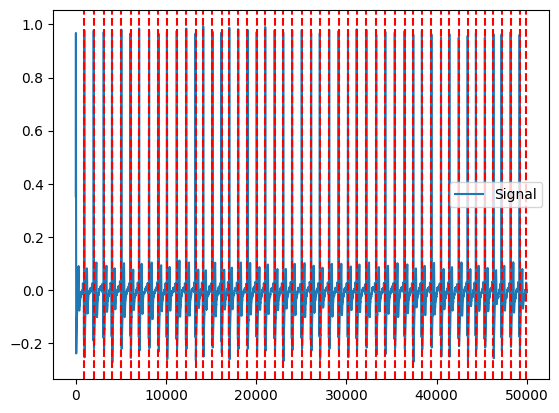

In [4]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

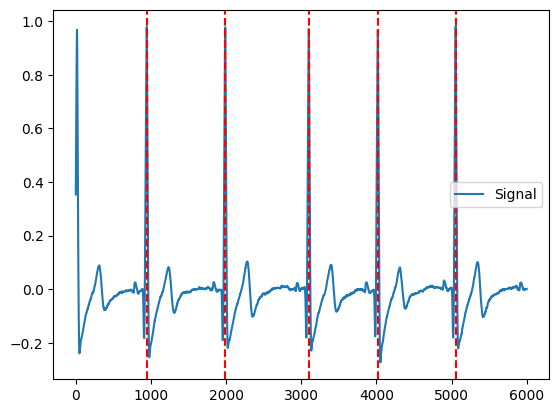

In [5]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6 * SAMPLING_RATE])

In [6]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

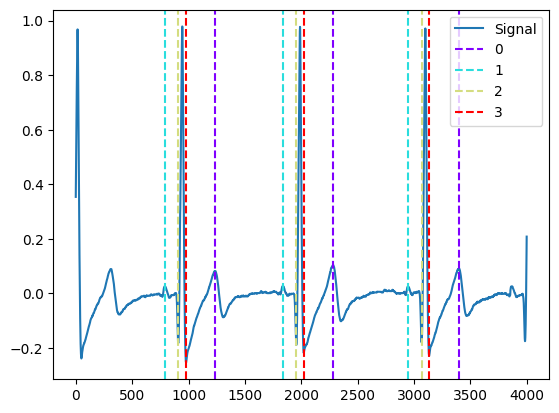

In [7]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4 * SAMPLING_RATE])

In [8]:
print([ecg_signal[i] for i in rpeaks['ECG_R_Peaks']])

[np.float64(0.978647548), np.float64(0.977179075), np.float64(0.971310699), np.float64(0.966844969), np.float64(0.98046948), np.float64(0.966690318), np.float64(0.984970193), np.float64(0.974043505), np.float64(0.965466504), np.float64(0.969775054), np.float64(0.975325839), np.float64(0.984714094), np.float64(0.965936392), np.float64(0.992387678), np.float64(0.972850813), np.float64(0.969884528), np.float64(0.987362653), np.float64(0.982140344), np.float64(0.979869347), np.float64(0.971783071), np.float64(0.990465364), np.float64(0.978376038), np.float64(0.96981961), np.float64(0.977264503), np.float64(0.978133212), np.float64(0.967893364), np.float64(0.967352523), np.float64(0.980090405), np.float64(0.975249128), np.float64(0.964564106), np.float64(0.981750488), np.float64(0.979996121), np.float64(0.960044275), np.float64(0.97250208), np.float64(0.969637763), np.float64(0.975165544), np.float64(0.962041745), np.float64(0.975116058), np.float64(0.96286961), np.float64(0.949465073), np.

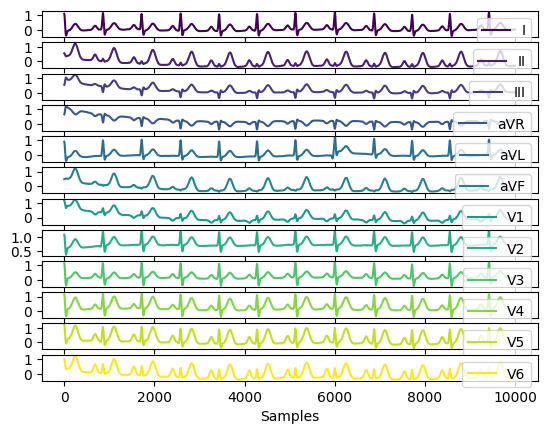

In [9]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize result
nk.signal_plot(ecg12, subplots=True)

In [10]:
ecg12['II']

0       0.554591
1       0.553294
2       0.550942
3       0.547595
4       0.543333
          ...   
9995   -0.298758
9996   -0.298640
9997   -0.298488
9998   -0.298277
9999   -0.297980
Name: II, Length: 10000, dtype: float64

In [11]:
def toFeature(signal: pd.core.frame.DataFrame):
    clean = nk.ecg_clean(signal['II'], sampling_rate=SAMPLING_RATE)
    _, rpeaks = nk.ecg_peaks(clean, sampling_rate=SAMPLING_RATE)
    F = []
    for lead in ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4',
                 'V5', 'V6']:
        clean = nk.ecg_clean(signal[lead], sampling_rate=SAMPLING_RATE)
        _, waves_peak = nk.ecg_delineate(clean, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
        _, rpeaks = nk.ecg_peaks(clean, sampling_rate=SAMPLING_RATE)
        ## no sé si es mejor sacar la altura de la señal original o sacarla de la señal limpia
        mean_r = np.mean([clean[i] if not np.isnan(i) else 0 for i in rpeaks['ECG_R_Peaks']])
        mean_p = np.mean([clean[i] if not np.isnan(i) else 0 for i in waves_peak['ECG_P_Peaks']])
        mean_q = np.mean([clean[i] if not np.isnan(i) else 0 for i in waves_peak['ECG_Q_Peaks']])
        mean_s = np.mean([clean[i] if not np.isnan(i) else 0 for i in waves_peak['ECG_S_Peaks']])
        F += [mean_r, mean_p, mean_q, mean_s]
    ## el vector de tiempos/puntos fibuciales se refiere a rpeaks? 
    return np.array(F)

In [12]:
F = toFeature(ecg12)

In [13]:
len(F)

48

In [24]:
clean = nk.ecg_clean(ecg12["I"], sampling_rate=SAMPLING_RATE)
_, rpeaks = nk.ecg_peaks(clean, sampling_rate=SAMPLING_RATE)
time = nk.hrv_time(rpeaks)
freq = nk.hrv_frequency(rpeaks)
nlin = nk.hrv_nonlinear(rpeaks)

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


In [25]:
freq.head()

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
